# Read Data

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

warnings.simplefilter("ignore")

In [2]:
# !unzip train.zip
data = pd.read_csv('train.csv')
print(f'{data.shape}')
data.head()

(43152, 11)


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


### Quick glance on Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The data has no missing values ('Nan', 'Null')

In [5]:
data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see that the `price` std is higher than its mean which indicates the presence of outliers.
we also noticed that the min value for `x`, `y`, `z` is zero, in some cases zero is considered a missing value, but in our case since the rang of values for these three columns starts from zero we won't consider it as a missing value.

# Data Visualization & Analysis

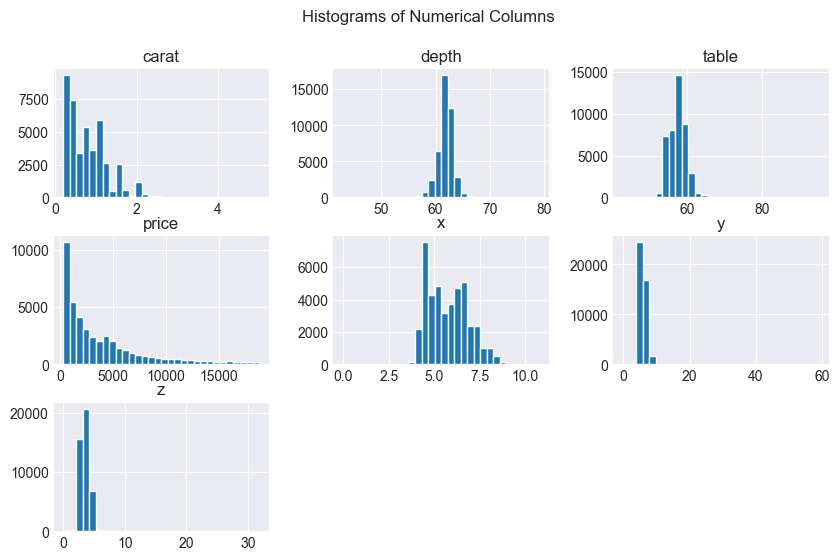

In [6]:
num_attr = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

plt.style.use("seaborn-darkgrid")
data[num_attr].hist(bins=30, figsize=(10, 6), edgecolor='white')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

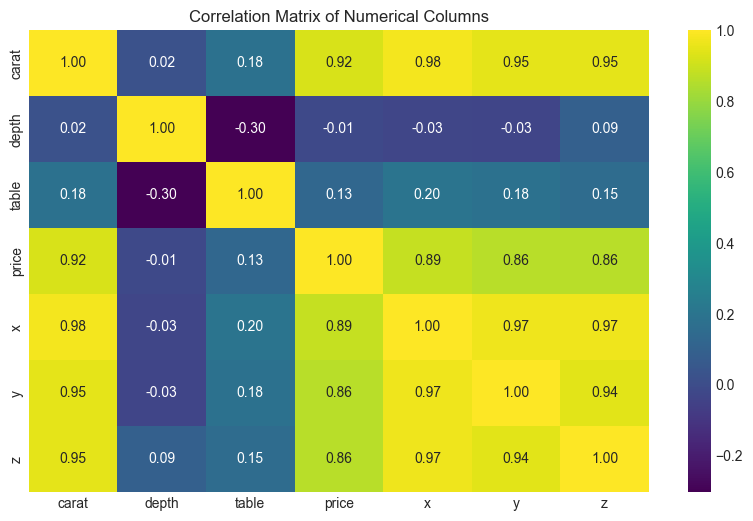

In [7]:
corr_matrix = data[num_attr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

We can see that there is high correlation between `price`, `carat`, `x`, `y`, `z` features

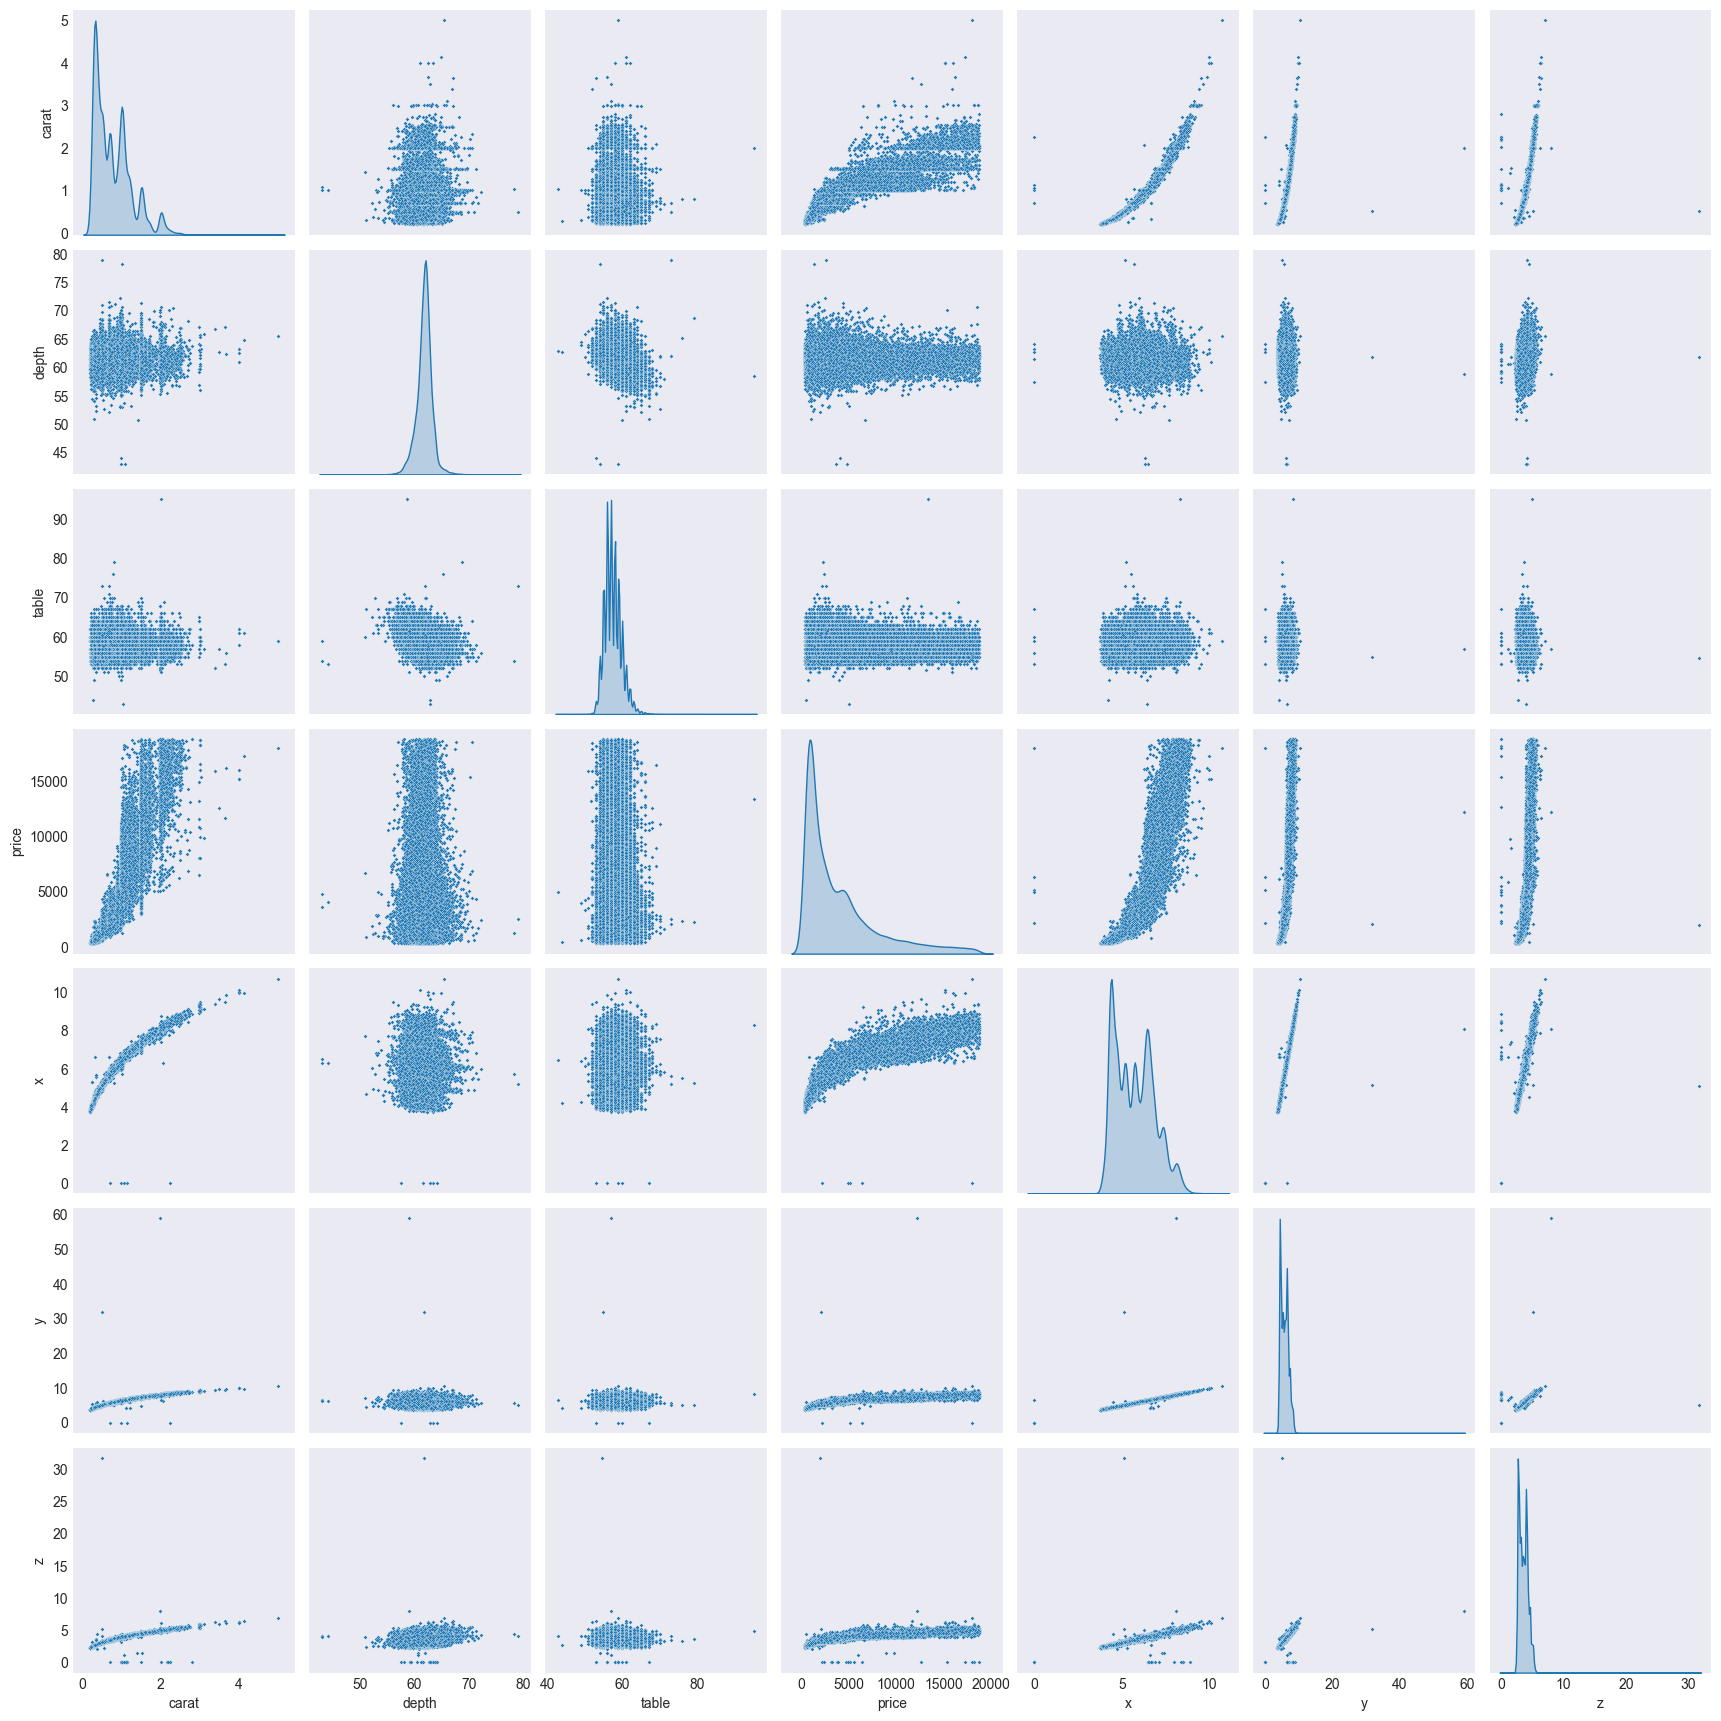

In [8]:
sns.set_style("dark")
sns.pairplot(data[num_attr], hue=None,
             plot_kws=dict(marker="D", s=4),
             diag_kind='kde',
             diag_kws=dict(fill=True))
plt.show()

- There appears to be a positive correlation between carat weight and price. This means that diamonds with a higher carat weight tend to cost more. This is likely because larger diamonds are rarer and more difficult to find.

- There appears to be a positive correlation between carat, price and all three diamond measurements(x, y, z).


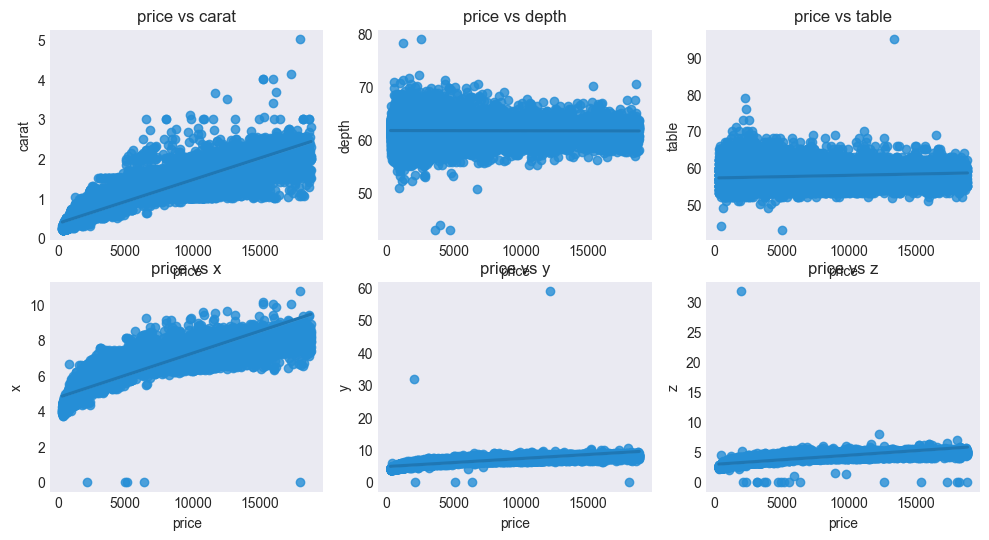

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0,0].set_title('price vs carat')
sns.regplot(x='price', y='carat', data=data, ax=axs[0,0], fit_reg=True, scatter_kws={'color': '#258ED6'})

axs[0,1].set_title('price vs depth')
sns.regplot(x='price', y='depth', data=data, ax=axs[0,1], fit_reg=True, scatter_kws={'color': '#258ED6'})

axs[0,2].set_title('price vs table')
sns.regplot(x='price', y='table', data=data, ax=axs[0,2], fit_reg=True, scatter_kws={'color': '#258ED6'})

axs[1,0].set_title('price vs x')
sns.regplot(x='price', y='x', data=data, ax=axs[1,0], fit_reg=True, scatter_kws={'color': '#258ED6'})

axs[1,1].set_title('price vs y')
sns.regplot(x='price', y='y', data=data, ax=axs[1,1], fit_reg=True, scatter_kws={'color': '#258ED6'})

axs[1,2].set_title('price vs z')
sns.regplot(x='price', y='z', data=data, ax=axs[1,2], fit_reg=True, scatter_kws={'color': '#258ED6'})

plt.show()

This plot is helpful in identifying outliers, we can see data points that are far away from the main cluster of points or that cause the regression line to deviate from the general trend.

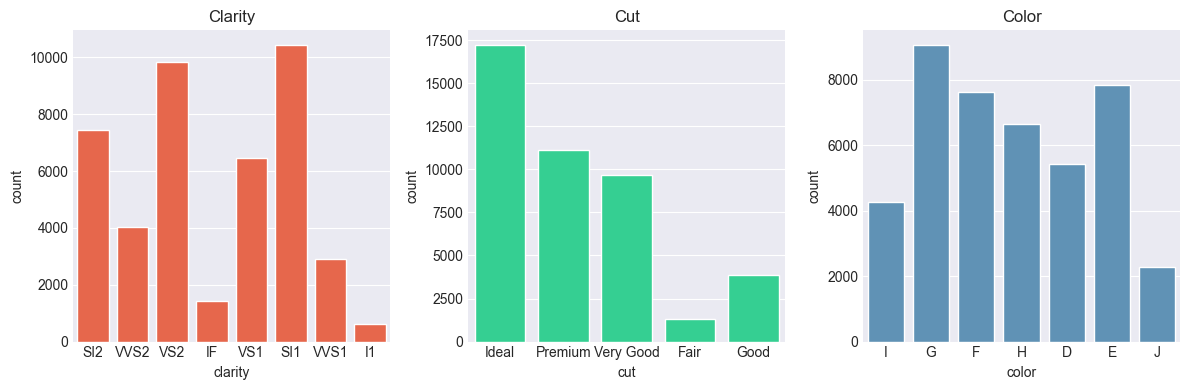

In [10]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].set_title('Clarity')
# sns.histplot(data=data, x='clarity', bins=10, ax=axs[0], color='#FF5733')
sns.countplot(data=data, x='clarity', ax=axs[0], color='#FF5733')

axs[1].set_title('Cut')
# sns.histplot(data=data, x='cut', bins=10, ax=axs[1], color='#1CE897')
sns.countplot(data=data, x='cut', ax=axs[1], color='#1CE897')

axs[2].set_title('Color')
# sns.histplot(data=data, x='color', bins=10, ax=axs[2])
sns.countplot(data=data, x='color', ax=axs[2], color='#5294C3')

plt.tight_layout()
plt.show()

- For clarity, the most frequent category is SI1, followed by VS2 and SI2.
- For cut, the most frequent category is Very Ideal, followed by Premium and Very Good.
- For color, the most frequent category is G, followed by E and F.

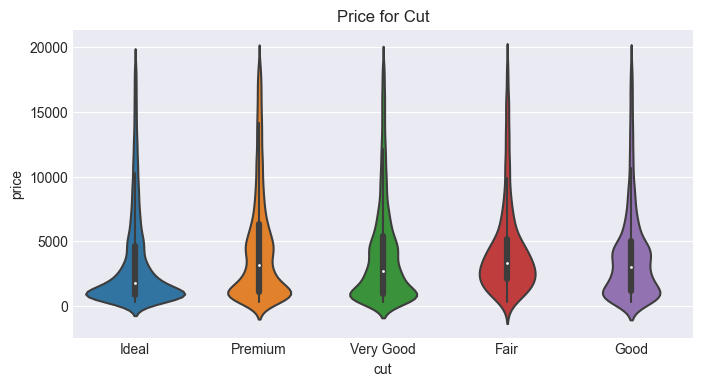

In [11]:
plt.figure(figsize=(8, 4))
sns.violinplot(x="cut",y="price", data=data)
plt.title('Price for Cut')
plt.show()

- We can see a wider violin for "Ideal" cuts compared to "Fair" cuts, indicating a larger spread of prices for higher quality diamonds.
- The median price follows a clear trend (increasing from high quality cuts to low quality cuts), which suggests a correlation between cut quality and price.

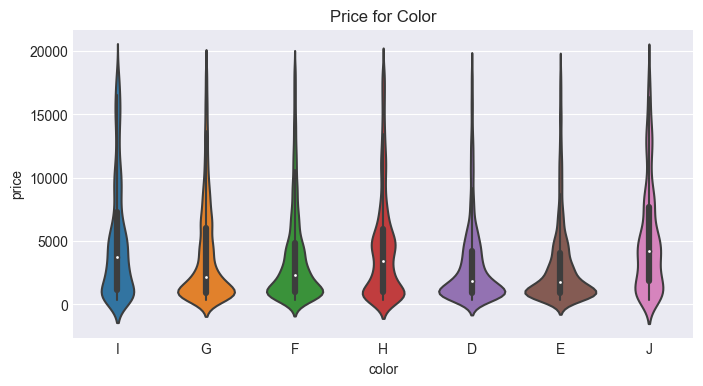

In [12]:
plt.figure(figsize=(8, 4))
sns.violinplot(x="color",y="price", data=data)
plt.title('Price for Color')
plt.show()

- We can see a wider violin for "D", "E" colors compared to "J", "I" colors, indicating a larger spread of prices for better color diamonds.

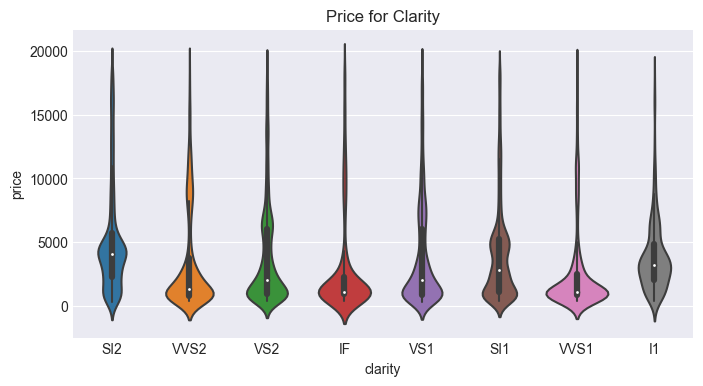

In [13]:
plt.figure(figsize=(8, 4))
sns.violinplot(x="clarity",y="price", data=data)
plt.title('Price for Clarity')
plt.show()

- There is a wider violin for better clarity "IF","VVS1" compared to worse clarity "I1", "SI2" indicating a larger spread of prices for clear diamonds.
- The more the diamond clarity gets better the more the median price decrease, this suggests a correlation between diamond clarity and price.

# Data Preprocessing

### Building Our Own Preprocessor 

In this step we built our own preprocessor that does the followings:

- drop the Id column since it won't be beneficial for the training process
- create a new feature volume 
- use ordinal encoder since there's a clear order or ranking between the categories of the categorical features,<br> the ordinal encoder assigns numerical labels to categories of a categorical features, preserving the inherent order or ranking between them.

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, cut_order, color_order, clarity_order):
        self.cut_order = cut_order
        self.color_order = color_order
        self.clarity_order = clarity_order

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop the 'Id' column
        X = X.drop(['Id'], axis=1)

        # Create a new feature 'volume'
        X['volume'] = X['x'] * X['y'] * X['z']

        # Encode categorical features
        categorical_features = ['cut', 'color', 'clarity']
        encoder = OrdinalEncoder(categories=[self.cut_order, self.color_order, self.clarity_order])
        X[categorical_features] = encoder.fit_transform(X[categorical_features])

        return X

# Define category orders
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

### Handling Outliers

In [15]:
data = data[(data["depth"] < 75) & (data["depth"] > 50)]
data = data[(data["table"] < 80) & (data["table"] > 40)]
data = data[(data["x"] < 20)]
data = data[(data["y"] < 20)]
data = data[(data["z"] < 20) & (data["z"] > 2)]
data.shape

(43123, 11)

### Splitting Data

In [16]:
features = data.drop(["price"],axis =1)
label = data["price"]

X_train, X_valid, y_train, y_valid = train_test_split(features, label, test_size=0.25, random_state=42)

In [17]:
print(f'training set shape: {X_train.shape}')
print(f'validation set shape: {X_valid.shape}')

training set shape: (32342, 10)
validation set shape: (10781, 10)


### Preprocessing & Scaling

Our data has features with different value ranges , `carat` feature has values ranging from 0 to 5,<br> while other features like `depth` might range around 60, `x` could be ranging from 0 to 10 <br> and the new feature `volume` ranges for 30 to 790 and so on.

These disparate ranges can cause problems for machine learning algorithms because features with larger values<br> will dominate the model's learning process, even if they aren't necessarily more important.

So in order to ensure that all features contribute equally to the model's learning process<br> regardless of their original units or scales we added StandardScaler.

In [18]:
full_pipeline = Pipeline([
 ('preprocessor', Preprocessor(cut_order, color_order, clarity_order)),
 ('standard_scaler', StandardScaler())])

In [19]:
# features_pre = full_pipeline.fit_transform(features)
X_train_pre = full_pipeline.fit_transform(X_train)
X_valid_pre =  full_pipeline.transform(X_valid)

# Model Building

### Linear Regression Model

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_pre, y_train)

lin_predictions = lin_reg.predict(X_valid_pre)
lin_rmse = mean_squared_error(y_valid, lin_predictions, squared=False)
print(f"Linear Regression RMSE: {lin_rmse}")

Linear Regression RMSE: 1181.908731519761


### Polynomial Regression Model

In [21]:
poly_degree = 3
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train_pre)
X_valid_poly = poly_features.transform(X_valid_pre)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


poly_predictions = poly_model.predict(X_valid_poly)

poly_rmse = mean_squared_error(y_valid, poly_predictions, squared=False)
print(f"Polynomial Regression RMSE: {poly_rmse}") 

Polynomial Regression RMSE: 636.2664101060142


### Decision Tree Model

In [22]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_pre, y_train)

tree_predictions = tree_reg.predict(X_valid_pre)
tree_rmse = mean_squared_error(y_valid, tree_predictions, squared=False)
print(f"Decision tree RMSE: {tree_rmse}")

Decision tree RMSE: 747.3101261585598


In [23]:
tree_rmses = -cross_val_score(tree_reg, X_train_pre, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

print("Scores: ", tree_rmses)
print("Mean: ", tree_rmses.mean())
print("Standard Deviation: ", tree_rmses.std())

Scores:  [736.72974552 787.37868313 730.73569091 739.14709828 779.82578192
 785.80390747 771.03867231 757.72219611 744.93703554 760.18134147]
Mean:  759.3500152676211
Standard Deviation:  19.97745043411137


### Random Forest Model

In [24]:
forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train_pre, y_train)
forest_predictions = forest_reg.predict(X_valid_pre)

forest_rmse = mean_squared_error(y_valid, forest_predictions, squared=False)
print(f"Random forest RMSE: {forest_rmse}")

Random forest RMSE: 535.5727079521512


#### Grid Search

In [58]:
param_grid = {
    'bootstrap': [False, True],
     'n_estimators': [100, 200, 300],
     'max_features': [8, 10, 15]
    }


grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                          )

grid_search.fit(X_train_pre, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_features': 8, 'n_estimators': 300}
Best Estimator: RandomForestRegressor(max_features=8, n_estimators=300, random_state=42)


In [60]:
forest_grid_reg = grid_search.best_estimator_
forest_grid_predictions = forest_grid_reg.predict(X_valid_pre)

forest_grid_rmse = mean_squared_error(y_valid, forest_grid_predictions, squared=False)
forest_grid_rmse

530.9348166690869

In [25]:
forest_reg = RandomForestRegressor(max_features=8 , n_estimators=200, random_state=42)

forest_reg.fit(X_train_pre, y_train)
forest_predictions = forest_reg.predict(X_valid_pre)

forest_rmse = mean_squared_error(y_valid, forest_predictions, squared=False)
print(f"Random forest RMSE: {forest_rmse}")

Random forest RMSE: 530.6453685130033


### KNN Model

In [26]:
knn_reg = KNeighborsRegressor(n_neighbors=10, weights="distance", p=1, algorithm="auto")
knn_reg.fit(X_train_pre, y_train) 

knn_predictions = knn_reg.predict(X_valid_pre)
knn_rmse = mean_squared_error(y_valid, knn_predictions, squared=False)
print(f"KNN RMSE: {knn_rmse}")

KNN RMSE: 650.6476026767234


In [27]:
knn_rmses = -cross_val_score(knn_reg, X_train_pre, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

print("Scores: ", knn_rmses)
print("Mean: ", knn_rmses.mean())
print("Standard Deviation: ", knn_rmses.std())

Scores:  [667.77667896 738.53874034 677.99210115 611.99408045 681.88185847
 675.7893297  654.94506536 652.02646763 664.25039956 665.6783472 ]
Mean:  669.0873068813659
Standard Deviation:  29.830958398621707


### XGBoost Model

In [28]:
xgb_regressor = XGBRegressor(random_state=42)

xgb_regressor.fit(X_train_pre, y_train)

xgb_predictions = xgb_regressor.predict(X_valid_pre)

rmse = mean_squared_error(y_valid, xgb_predictions, squared=False)
print(f"XGBoost Regressor RMSE: {rmse}")

XGBoost Regressor RMSE: 535.2513119470113


#### Grid search

In [65]:
param_grid = {
  'max_depth': [6, 8, 10],
  'n_estimators': [100, 200, 300],
  'min_child_weight': [1, 3, 5],
}
  
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_pre, y_train)

print("Best XGBoost Regressor Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Regressor Parameters: {'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 300}


In [66]:
best_xgb_regressor = grid_search.best_estimator_
predictions = best_xgb_regressor.predict(X_valid_pre)
rmse = mean_squared_error(y_valid, predictions, squared=False)
print(f"XGBoost Regressor with GridSearchCV RMSE: {rmse}")

XGBoost Regressor with GridSearchCV RMSE: 512.6975941404929


In [29]:
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',
    max_depth=8,              # 8
    n_estimators=100,         # 100
    learning_rate=0.1,        # 0.1
    min_child_weight=3,       # 3
    reg_alpha=2,              # 2
    reg_lambda=1,             # 1
    random_state=42
)


xgb_regressor.fit(X_train_pre, y_train)

xgb_predictions = xgb_regressor.predict(X_valid_pre)

rmse = mean_squared_error(y_valid, xgb_predictions, squared=False)
print(f"XGBoost Regressor RMSE: {rmse}")

XGBoost Regressor RMSE: 509.5433658863183


# Evaluation

In [68]:
X_test = pd.read_csv('test.csv')
X_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [69]:
submission = X_test[["Id"]]

In [70]:
X_test_prepared =  full_pipeline.transform(X_test)

In [73]:
predictions = xgb_regressor.predict(X_test_prepared)
submission['price'] = predictions

In [75]:
submission.head()
submission.to_csv('submission.csv', index=None)